In [5]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
%matplotlib inline

### Roadmap

* Generate CMB simulations based on the ideal Planck spectrum.
* Obtain the cosmic birefringence angle from each simulation (around 100-1000 simulations)
* Plot the distribution of the angle $\beta$ on a histogram
* Detect the STD of $\beta$ from the histogram
  
   -> For $D_\ell^{EB}$, $D_\ell^{TB}$ and the joint estimator $D_\ell^{EB+TB}$
* Compare STDs with the analytical results obtained in the thesis.

In [12]:
#Planck fiducial power spectrum
l, TT, TE, EE, BB, PP = np.loadtxt('COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt',unpack=True)
l = l.astype(int)

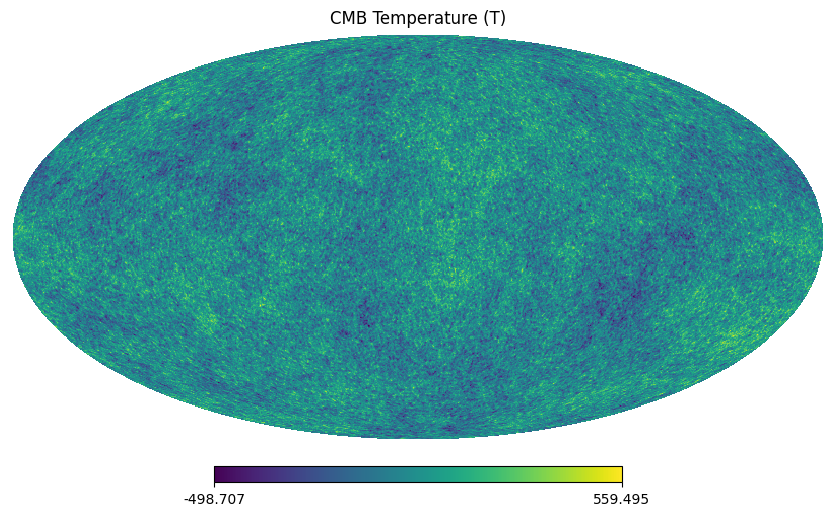

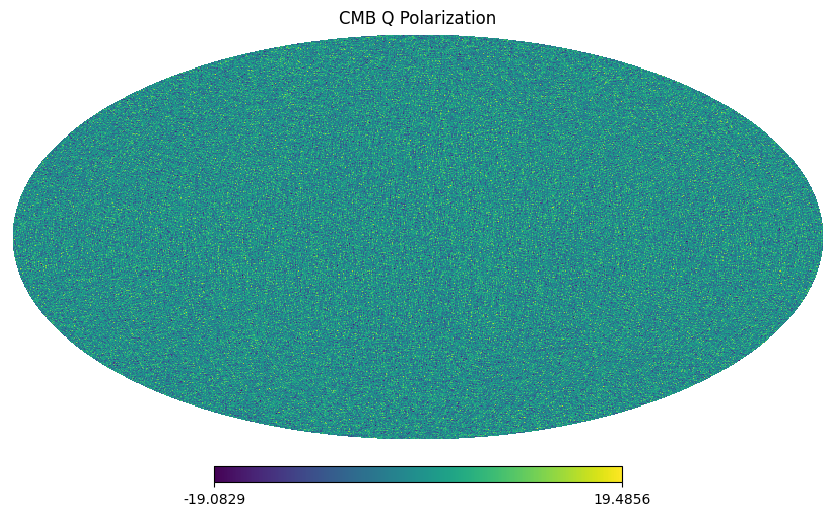

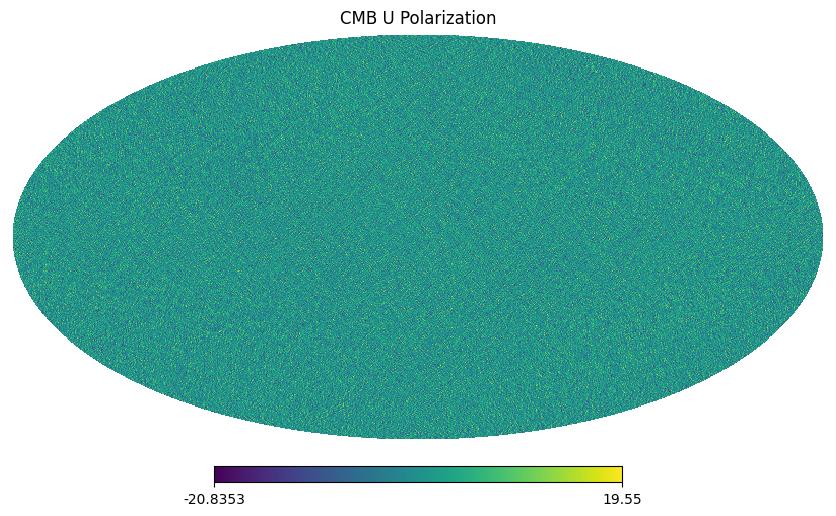

In [13]:
nside = 1024
lmin = 2
lmax = 2 * nside

#Conversion from Dl to Cl
factor = 2 * np.pi / (l * (l + 1))
Cl_TT = TT * factor
Cl_EE = EE * factor
Cl_BB = BB * factor
Cl_TE = TE * factor

#Creating an array of zeros
Cl_tt = np.zeros(lmax + 1)
Cl_ee = np.zeros(lmax + 1)
Cl_bb = np.zeros(lmax + 1)
Cl_te = np.zeros(lmax + 1)

#Setting limits on l
mask = (l >= lmin) & (l <= lmax)
Cl_tt[2:lmax + 1] = Cl_TT[mask]
Cl_ee[2:lmax + 1] = Cl_EE[mask]
Cl_bb[2:lmax + 1] = Cl_BB[mask]
Cl_te[2:lmax + 1] = Cl_TE[mask]

cls = [Cl_tt, Cl_ee, Cl_bb, Cl_te]

#Generating T, Q, U maps
TQU_map = hp.synfast(cls, nside=nside, lmax=lmax, pol=True, new=True)

# Plotting the maps
hp.mollview(TQU_map[0], title="CMB Temperature (T)")
hp.mollview(TQU_map[1], title="CMB Q Polarization")
hp.mollview(TQU_map[2], title="CMB U Polarization")
plt.show()


In [ ]:
num_sims = 100

for i in range(num_sims):
    TQU_map = hp.synfast(cls, nside=nside, lmax=lmax, pol=True, new=True)
 
#STD of beta
    STD_beta = ...
    print(f"Simulation {i+1}: STD of $\beta$ = {} $\sigma$")